In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn

# Step 1: Load your data

In [2]:
conflict = pd.read_csv("Project 1_Data.csv")

I've done something different between this project and Project 1: in Project 1, I split the dataset almost immediately. For Project 2, if I want to be able to identify the target feature, though, I first want to prepare the data, assign the X (all features except 'Battle related deaths') and y (the target, 'Battle related deaths'), and then split along the X and y. This might be entirely wrong, but I've tried it the other way around and couldn't make it work. I've included it at the bottom of a file I've uploaded titled, 'Magnus_Project 1 Update and Project 2', which contains Project 1 corrections/explorations.

# Step 2: Prepare your data

In [3]:
print(conflict.dtypes)

Country Name                                              object
Year                                                       int64
Adjusted_net_national_income_per_capita__current_US__    float64
Death_rate__crude__per_1_000_people_                     float64
GDP__current_US__                                        float64
GDP_per_capita__current_US__                             float64
Military_expenditure__current_USD_                       float64
Population_density__people_per_sq__km_of_land_area_      float64
Population__total                                        float64
Rural_population                                         float64
Urban_population                                         float64
Battle_related_deaths__number_of_people_                   int64
dtype: object


In [4]:
conflict["Year"] = conflict["Year"].astype("object")

In [5]:
print(conflict.isnull().sum())

Country Name                                                0
Year                                                        0
Adjusted_net_national_income_per_capita__current_US__    6531
Death_rate__crude__per_1_000_people_                     1465
GDP__current_US__                                        3400
GDP_per_capita__current_US__                             3403
Military_expenditure__current_USD_                       5992
Population_density__people_per_sq__km_of_land_area_       872
Population__total                                         332
Rural_population                                          450
Urban_population                                          450
Battle_related_deaths__number_of_people_                    0
dtype: int64


One Hot Encoder of the categorical variables "Country Name" and "Year"

In [6]:
countryname_enc = pd.get_dummies(conflict["Country Name"])

In [7]:
print(countryname_enc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 224 entries, Afghanistan to Zimbabwe
dtypes: uint8(224)
memory usage: 2.9 MB
None


In [8]:
year_enc = pd.get_dummies(conflict["Year"])

In [9]:
print(year_enc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 60 columns):
1960    13440 non-null uint8
1961    13440 non-null uint8
1962    13440 non-null uint8
1963    13440 non-null uint8
1964    13440 non-null uint8
1965    13440 non-null uint8
1966    13440 non-null uint8
1967    13440 non-null uint8
1968    13440 non-null uint8
1969    13440 non-null uint8
1970    13440 non-null uint8
1971    13440 non-null uint8
1972    13440 non-null uint8
1973    13440 non-null uint8
1974    13440 non-null uint8
1975    13440 non-null uint8
1976    13440 non-null uint8
1977    13440 non-null uint8
1978    13440 non-null uint8
1979    13440 non-null uint8
1980    13440 non-null uint8
1981    13440 non-null uint8
1982    13440 non-null uint8
1983    13440 non-null uint8
1984    13440 non-null uint8
1985    13440 non-null uint8
1986    13440 non-null uint8
1987    13440 non-null uint8
1988    13440 non-null uint8
1989    13440 non-null uint8
1990    13440 non-nul

Imputer using the strategy = mean for the continuous variables

In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="mean")

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
conflict_num = conflict.drop("Country Name", axis=1)

In [12]:
conflict_num = conflict_num.drop("Year", axis=1)

In [13]:
conflict_num.shape
conflict_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 10 columns):
Adjusted_net_national_income_per_capita__current_US__    6909 non-null float64
Death_rate__crude__per_1_000_people_                     11975 non-null float64
GDP__current_US__                                        10040 non-null float64
GDP_per_capita__current_US__                             10037 non-null float64
Military_expenditure__current_USD_                       7448 non-null float64
Population_density__people_per_sq__km_of_land_area_      12568 non-null float64
Population__total                                        13108 non-null float64
Rural_population                                         12990 non-null float64
Urban_population                                         12990 non-null float64
Battle_related_deaths__number_of_people_                 13440 non-null int64
dtypes: float64(9), int64(1)
memory usage: 1.0 MB


In [14]:
imputer.fit(conflict_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [15]:
imputer.statistics_

array([6.38708204e+03, 1.05395572e+01, 3.66643775e+11, 8.45537928e+03,
       1.31439113e+10, 3.19506808e+02, 3.11112350e+07, 1.51191263e+07,
       1.62673031e+07, 1.04845313e+02])

In [16]:
conflict_num.mean().values

array([6.38708204e+03, 1.05395572e+01, 3.66643775e+11, 8.45537928e+03,
       1.31439113e+10, 3.19506808e+02, 3.11112350e+07, 1.51191263e+07,
       1.62673031e+07, 1.04845313e+02])

In [17]:
X = imputer.transform(conflict_num)

In [18]:
conflict = pd.DataFrame(X, columns=conflict_num.columns)

In [19]:
conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 10 columns):
Adjusted_net_national_income_per_capita__current_US__    13440 non-null float64
Death_rate__crude__per_1_000_people_                     13440 non-null float64
GDP__current_US__                                        13440 non-null float64
GDP_per_capita__current_US__                             13440 non-null float64
Military_expenditure__current_USD_                       13440 non-null float64
Population_density__people_per_sq__km_of_land_area_      13440 non-null float64
Population__total                                        13440 non-null float64
Rural_population                                         13440 non-null float64
Urban_population                                         13440 non-null float64
Battle_related_deaths__number_of_people_                 13440 non-null float64
dtypes: float64(10)
memory usage: 1.0 MB


Bringing the One Hot Coded variables back together with the continuous variables, first by resetting the indexes so they don't mismatch and introduce NAs

In [20]:
countryname_enc.reset_index(drop=True, inplace=True)
year_enc.reset_index(drop=True, inplace=True)
conflict.reset_index(drop=True, inplace=True)

In [21]:
finalconflicttrain = countryname_enc.join(year_enc, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [22]:
conflictnp = finalconflicttrain.join(conflict, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [23]:
conflictnp.shape

(13440, 294)

In [24]:
from pandas.plotting import scatter_matrix

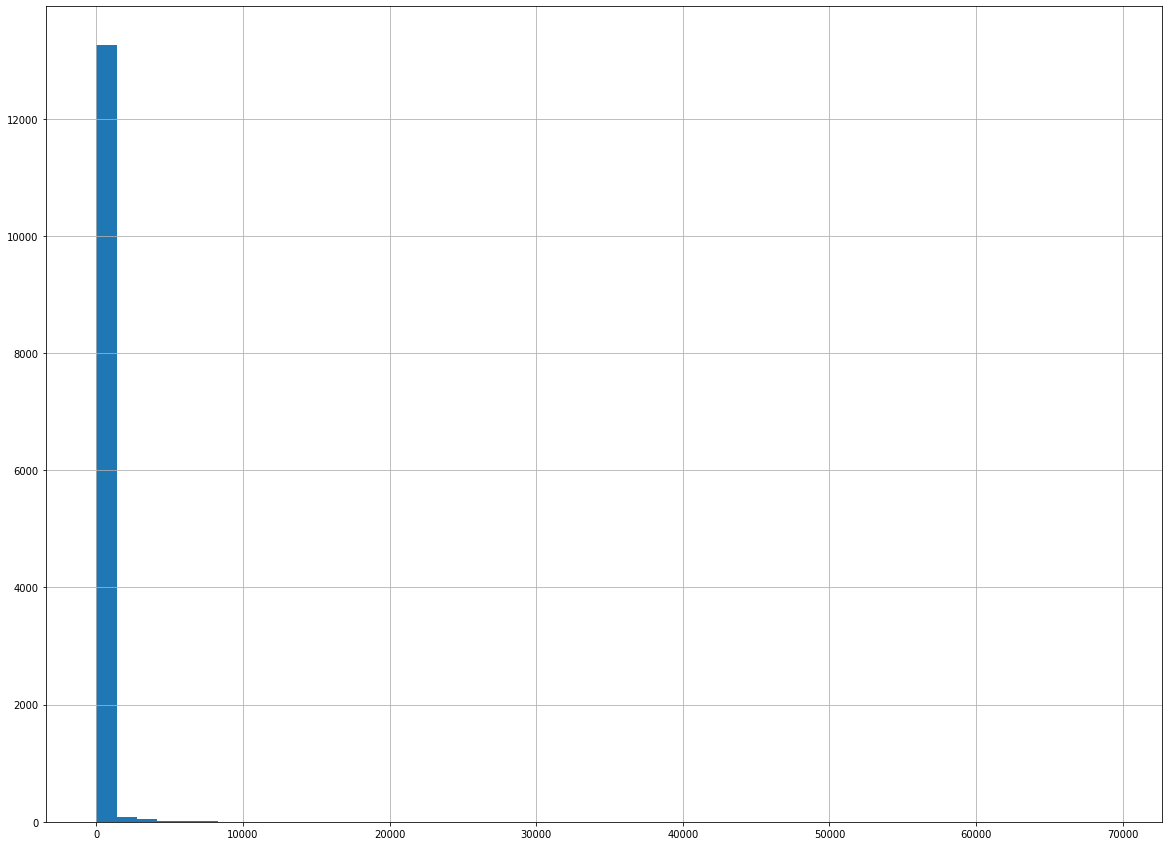

In [25]:
conflictnp["Battle_related_deaths__number_of_people_"].hist(bins=50, figsize=(20,15)) 
plt.show()

The variable 'Battle Related Deaths' is neither Guassian nor normal; it is heavily right-skewed, with a majority of the observations having a value of 0 (please see some value counts below). While I explored a logarithmic variable of 'Battle related deaths' in Project 1 and would also like to do so here to compare/contrast train/test scores between the two, I'm just going to start with the original, non-normalized observations provided. 

In [79]:
conflict_df['Battle_related_deaths__number_of_people_'].value_counts()

0.0       12491
50.0         16
25.0         15
1.0          11
2.0          10
          ...  
997.0         1
6052.0        1
4071.0        1
495.0         1
1173.0        1
Name: Battle_related_deaths__number_of_people_, Length: 631, dtype: int64

# Step 3: Select your target attribute

I struggled with this for the longest time (and I still may have done it incorrectly) because I forgot the basics of splicing :)

In [32]:
conflict_df = pd.DataFrame(data=conflictnp)

In [34]:
conflict_df.shape

(13440, 294)

In [37]:
conflictnp = conflict_df.to_numpy()

In [38]:
X = conflictnp[:, 0:293]

In [39]:
X.shape

(13440, 293)

In [99]:
X_df = pd.DataFrame(data=X)

In [40]:
y = conflictnp[:, 293]

In [41]:
y.shape

(13440,)

I believe I figured out StratifiedSplit for Project 1 and I know we were supposed to just bring that directly over but I've gotten wildly confused about the different ways to split the data. 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 4a: Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression().fit(X_train, y_train)

In [46]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.12
Test set score: 0.09


Wow, so pretty horrible scores on both the training and test sets, indicating underfitting. It's important to note that I haven't scaled my inputs! My features' distributions are not all Gaussian, either - two factors that would probably result in better-performing linear regression models. There's also probably a ton of noise in this data, and certain variables (like total population, urban population, and rural population) are certainly correlated/lacking independence. Now, allow me to proceed with what is more and more apparently the inappropriate type of model for my dataset!

# Step 5a: Tuning, cross-validation, r2, RMSE, and MAE 

In [47]:
y_pred = lr.predict(X_test)

In [49]:
from sklearn import metrics

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 249.73652767277756
Mean Squared Error: 3023186.6552968314
Root Mean Squared Error: 1738.7313349959595


The large MAE, 250, indicates that my model is not very good at making predictions. The MSE and RMSE are both measures of fit. The RMSE, as the standard deviation of the prediction errors, is a measure of how far the data points are from the regression line. With an RMSE = 1739, we can safely say this is a very bad fit.I'm wondering, actually, if these numbers should be read in context of the range of the variable 'Battle related deaths', which has a range from 0 to ~7,000.


I'm now going to run a linear regression model using cross validation. Because of the size of the dataset, I might have been well served by using shuffle split validation. Hopefully, the cross validation will minimize any of the bias I may have introduced by not using a balanced train/test set.

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(lr, X, y)
print("Cross-validation scores: {}".format(scores))

C:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-validation scores: [-0.08612662 -0.48286207  0.00362175]


The accuracy results of my default 3-fold cross validation are negative!Which I did not realize they could be. I have to research this, because I don't understand what that means. It seems I do even more poorly when I increase the number of folds to 5 below. The average of scores = -0.19 while the average of scores2 = -16.03. I'm assuming that the farther away from 0 in a negative direction means I've done worse. 

In [53]:
scores2 = cross_val_score(lr, X, y, cv=5) 
print("Cross-validation scores: {}".format(scores2))

Cross-validation scores: [-1.41736886e-01 -7.96222661e+01 -2.93113384e-01 -7.22578394e-02
 -2.47696443e-04]


In [85]:
print("Average cross-validation score: {:.2f}".format(scores2.mean()))

Average cross-validation score: -16.03


I'm going to try a Ridge regression (L2 Penalty) to explore more/less robust regularization in the model -- Ridge is a tradeoff between model simplicity and model performance. Because I am already doing so poorly (underfitting, which means the model is too simple), I don't believe Ridge is going to help me.

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.12
Test set score: 0.09


C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.17125e-29): result may not be accurate.
  overwrite_a=True).T


In [56]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.12
Test set score: 0.08


C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90691e-28): result may not be accurate.
  overwrite_a=True).T


In [57]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.12
Test set score: 0.09


C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23307e-30): result may not be accurate.
  overwrite_a=True).T


In [84]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.12
Test set score: 0.09


C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24092e-31): result may not be accurate.
  overwrite_a=True).T


Increasing alpha moves more coefficients towards 0. My ridge models perform almost identically to my plain linear regression model, with a higher alpha slightly worsening the test set score. 

I'm now going to try using Lasso regression (L1 Penalty). In these models, if alpha is too high it will 0 out too many coefficients; an alpha value that is too low will result in a model that is effectively unregularized. 

In [58]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.12
Test set score: 0.09
Number of features used: 62


C:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6280020955.091457, tolerance: 1382997.0722099077
  positive)


In [59]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.12
Test set score: 0.09
Number of features used: 285


In [60]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.12
Test set score: 0.09
Number of features used: 292


C:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6062598523.974706, tolerance: 1382997.0722099077
  positive)


In [81]:
lasso100 = Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso100.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso100.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso100.coef_ != 0))

Training set score: 0.00
Test set score: 0.00
Number of features used: 8


In [83]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso10.coef_ != 0))

Training set score: 0.04
Test set score: 0.02
Number of features used: 12


I have not achieved train/test scores that are any better by using Lasso.I still have a model that's really underfitting. With Lasso, I can adjust both the alpha values (significance of coefficients) and the max_iteration value (INSERT). When I decreased alpha, the model used almost all of the features (i.e. it's almost completely unregularized when it's considering 292 out of 294 features). When I dramatically increase the alpha to 100, the model zeroes out too many coefficients, using only 8 features and returning the worst possible train/test scores - 0. I didn't expect to do better with Lasso than I did with Ridge, but it has been curious to see the slight differences in resulting scores - it would appear that a completely unregularized Lasso performs better than a Lasso with an alpha as high as 10!

# Step 4b: Decision Trees and Forests+

I think I will have much more success with trees because trees look at variables and say, come as you are. You don't need to normalize, you don't need to standard scale. Trees have the tendency to overfit, which I'm excited about considering the linear model was so underfitted. Let's see if I need to consider pre/post-pruning.

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [62]:
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

In [86]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.346
Accuracy on test set: 0.504


I can't tell you how relieved I am to see a test score higher than 0.09. I know 0.504 is not a great score, but also consider that this is a very simple tree with a max_depth of only 3. I'm imagining this would be a very interpretable visualization. 

In [65]:
print("Decision Tree R^2: {:.2f}".format(tree.score(X_test, y_test)))
print("Decision Tree RMSE: {:.2f}".format(mean_squared_error(y_test, tree.predict(X_test))))

Decision Tree R^2: 0.50
Decision Tree RMSE: 1651270.46


I'm curious about the huge difference between the tree's R^2 and the tree's RMSE. If R^2 is explained variation/total variation, then this is saying that the model explains half of the variability of the response data around its mean.BUT, the RMSE being so high also makes it seem that this isn't a very good fit.

In [66]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.13019697 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05318857 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

In [100]:
################ I can't figure out how to put this in the nice chart, which makes interpreting it impossible
def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_df.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

AttributeError: module 'sklearn.tree' has no attribute 'feature_importances_'

In [98]:
######plot_feature_importances_cancer(tree)

AttributeError: module 'sklearn.tree' has no attribute 'feature_importances_'

So it seems like we're on the right track here with the decision trees. Time to explore a little more!

# Step 5b: Decision Tree Tuning Parameters and Forest Exploration

By setting a larger max depth, I give my tree more room to grow in complexity before it finds the best leaves.

In [67]:
tree2 = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

In [102]:
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.787
Accuracy on test set: 0.801


In [68]:
print("Decision Tree R^2: {:.2f}".format(tree2.score(X_test, y_test)))
print("Decision Tree RMSE: {:.2f}".format(mean_squared_error(y_test, tree2.predict(X_test))))

Decision Tree R^2: 0.80
Decision Tree RMSE: 664428.63


Cool! With more depth, I have better accuracy scores, a higher R^2, and a lower RMSE (it was >1,000,000 before).

I'm going to see what kind of luck I have with forests now. The forest is less easily interpretable but because it creates many trees and averages their scores, I'm hoping it will result in higher accuracy scores for both train and test.

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
forest = RandomForestRegressor(max_depth = 10, n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [104]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.578


Okay, the forest increased accuracy on my training set and decreased accuracy on my test set, which makes me think it overfit to the training set.

AttributeError: 'DataFrame' object has no attribute 'feature_names'

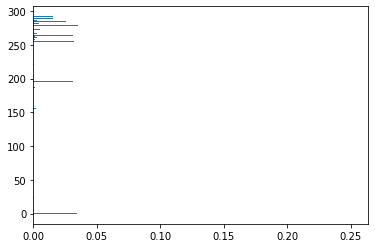

In [101]:
##wish I could figure this out
plot_feature_importances_cancer(forest)

In [106]:
forest2 = RandomForestRegressor(max_depth = 10, n_estimators=100, random_state=2)
forest2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [107]:
print("Accuracy on training set: {:.3f}".format(forest2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest2.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.343


My first forest didn't perform as well as my tree with max_depth = 5. I wondered if it was because I had a small number of estimators, so I made a second forest with a much higher number of estimators (100) which did a bit better on the training set but even worse on the test set.

I'm curious about Gradient Boosted trees and how well they'll model the data, with each shallow tree correcting the mistakes of the previous tree.

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.921


Wow! I guess this is my best model, huh.

In [75]:
gbrt1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)))

Accuracy on training set: 0.017
Accuracy on test set: 0.012


In [76]:
gbrt2 = GradientBoostingClassifier(n_estimators=10,random_state=0, learning_rate=0.9)
gbrt2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt2.score(X_test, y_test)))

Accuracy on training set: 0.006
Accuracy on test set: 0.004


The three of these GBRTs took about 10 hours to run, so that was fun to experience! I seem to have found a sweet spot with n_estimators=100, random_state=0, (and a default learning_rate=0.1) with the highest accuracy scores for both the train and test set. I am overfitting, however, and I'd like to try a lower learning rate to see how that works.


The other two trees did not perform well, and here are some reasons why that might be:
The learning_rate controls how strongly each tree tries to correct the previous tree. It's possible I should have used a higher learning rate so the trees could make stronger corrections.

While gradient boosted regression trees function on the concept that many shallower (i.e weaker trees) will be able to correct one another and provide the strongest accuracy, a max_depth of 1 is way too shallow to get anything done!

The higher n_estimators worked well because it adds more trees to the ensemble and increases model complexity. Only 10 trees with such a low learning rate? Wasn't going to help me!

I'm adding in one final gradient boosted tree below to see if I can do any better than my first one - I'm not sure I'll have the time before submission! But we'll see! 

In [108]:
gbrt3 = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.01)
gbrt3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt3.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.921


No, it did the same on its accuracy scores.

Given what I knew about the dataset and what I had done in preprocessing it, deciding to work with linear regression models didn't really make a lot of sense!

Decision trees and forests, based on their assumptions, made much more sense and provided much better accuracy results.